In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
train = pd.read_csv('../train.csv')
val = pd.read_csv('../val.csv')

In [3]:
train.head(2)

user  accounts_count  deposit_count  withdrawal_count  trade_sum_usd  \
0  0064320d             2.0            2.0               0.0     169085.758   
1  00667485             1.0            0.0               0.0          0.000   

   trade_profit_usd  trades_count     revenue        region device  
0             61.98          52.0  272.575580  Middle-Earth    Web  
1              0.00           0.0  688.525868        Narnia    Web

In [29]:
val.head(2)

user  accounts_count  deposit_count  withdrawal_count  trade_sum_usd  \
0  02e6f7e6             1.0            0.0               0.0        0.00000   
1  0407e6d6             3.0            3.0               0.0   824771.63361   

   trade_profit_usd  trades_count        region device  
0          0.000000           0.0       Hyboria    Web  
1         31.881086         186.0  Middle-Earth    Web

In [4]:
user

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user              2943 non-null   object 
 1   accounts_count    2943 non-null   float64
 2   deposit_count     2943 non-null   float64
 3   withdrawal_count  2943 non-null   float64
 4   trade_sum_usd     2943 non-null   float64
 5   trade_profit_usd  2905 non-null   float64
 6   trades_count      2943 non-null   float64
 7   revenue           2943 non-null   float64
 8   region            2943 non-null   object 
 9   device            2943 non-null   object 
dtypes: float64(7), object(3)
memory usage: 230.0+ KB


In [5]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user              993 non-null    object 
 1   accounts_count    993 non-null    float64
 2   deposit_count     993 non-null    float64
 3   withdrawal_count  993 non-null    float64
 4   trade_sum_usd     993 non-null    float64
 5   trade_profit_usd  989 non-null    float64
 6   trades_count      993 non-null    float64
 7   region            993 non-null    object 
 8   device            993 non-null    object 
dtypes: float64(6), object(3)
memory usage: 69.9+ KB


In [6]:
train.describe()

accounts_count  deposit_count  withdrawal_count  trade_sum_usd  \
count     2943.000000    2943.000000       2943.000000   2.943000e+03   
mean         1.010194       0.683996          0.169555   6.788280e+05   
std          0.998587       3.129546          1.119992   1.738502e+07   
min          0.000000       0.000000          0.000000   0.000000e+00   
25%          0.000000       0.000000          0.000000   0.000000e+00   
50%          1.000000       0.000000          0.000000   0.000000e+00   
75%          1.000000       0.000000          0.000000   0.000000e+00   
max         10.000000      71.000000         24.000000   9.114272e+08   

       trade_profit_usd  trades_count        revenue  
count       2905.000000   2943.000000    2943.000000  
mean          81.450938     19.672443     372.798131  
std         1911.424282    136.128019    7875.722321  
min            0.000000      0.000000       0.000000  
25%            0.000000      0.000000       0.000000  
50%            0.000000      0.000000       0.000000  
75%            0.000000      0.000000       0.000000  
max        95848.760000   3776.000000  407185.427031

In [7]:
val.describe() 

accounts_count  deposit_count  withdrawal_count  trade_sum_usd  \
count      993.000000     993.000000        993.000000   9.930000e+02   
mean         1.018127       0.801611          0.209466   3.920659e+05   
std          1.037441       4.021605          1.386292   5.460697e+06   
min          0.000000       0.000000          0.000000   0.000000e+00   
25%          0.000000       0.000000          0.000000   0.000000e+00   
50%          1.000000       0.000000          0.000000   0.000000e+00   
75%          1.000000       0.000000          0.000000   0.000000e+00   
max         14.000000      69.000000         19.000000   1.614513e+08   

       trade_profit_usd  trades_count  
count        989.000000    993.000000  
mean          25.759386     23.848943  
std          226.996635    238.319544  
min            0.000000      0.000000  
25%            0.000000      0.000000  
50%            0.000000      0.000000  
75%            0.000000      0.000000  
max         4553.550000   6740.000000

# accounts_count

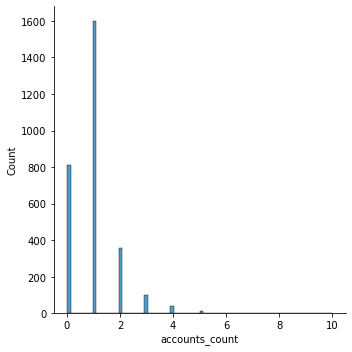

In [9]:
sns.displot(train.accounts_count)

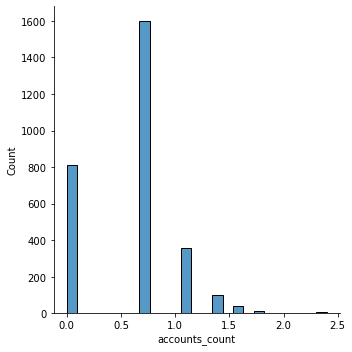

In [11]:
sns.displot(train.accounts_count.apply(lambda x: np.log1p(x)))

- распределение получилось менее скошенным 

# deposit_count 

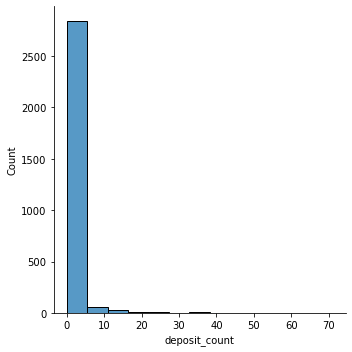

In [12]:
sns.displot(train.deposit_count)

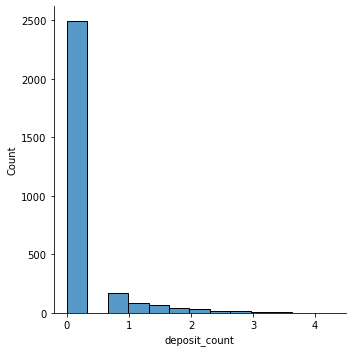

In [13]:
sns.displot(train.deposit_count.apply(lambda x: np.log1p(x)))

# withdrawal_count

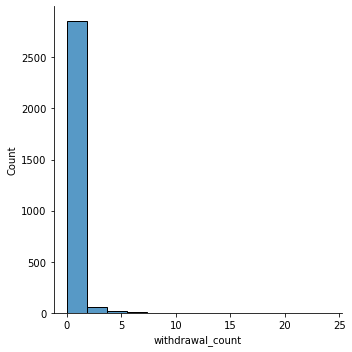

In [26]:
sns.displot(train.withdrawal_count)

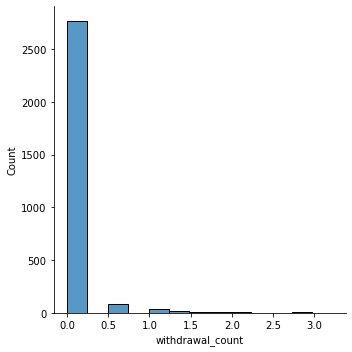

In [27]:
sns.displot(train.withdrawal_count.apply(lambda x: np.log1p(x)))

In [28]:
train.withdrawal_count.value_counts() 

0.0     2767
1.0       89
2.0       33
3.0       20
4.0       11
6.0        4
5.0        4
18.0       3
7.0        3
9.0        2
16.0       2
15.0       1
24.0       1
10.0       1
8.0        1
14.0       1
Name: withdrawal_count, dtype: int64

# trade_sum_usd 

In [30]:
train.trade_sum_usd.value_counts() 

0.000000         2559
542968.975000       1
209085.818850       1
18541.975700        1
25125.170000        1
                 ... 
94405.238050        1
520424.549601       1
19344.599900        1
59911.813000        1
62847.648004        1
Name: trade_sum_usd, Length: 385, dtype: int64

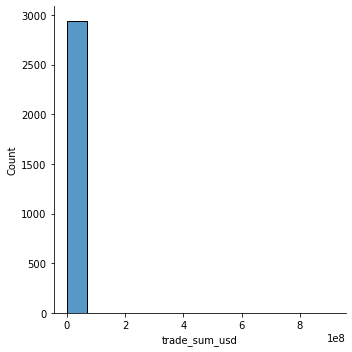

In [31]:
sns.displot(train.trade_sum_usd)

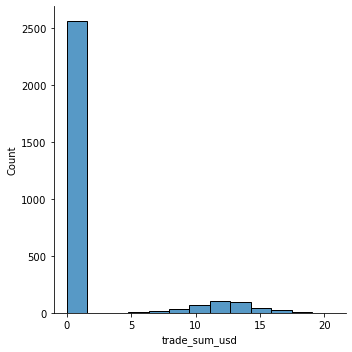

In [32]:
sns.displot(train.trade_sum_usd.apply(lambda x: np.log1p(x)))

# trade_profit_usd

In [33]:
train.trade_profit_usd.value_counts() 

0.000000      2559
9.250000         2
3.660000         2
0.820000         2
2.768855         1
              ... 
150.230000       1
0.046376         1
28.520000        1
188.722835       1
414.010000       1
Name: trade_profit_usd, Length: 344, dtype: int64

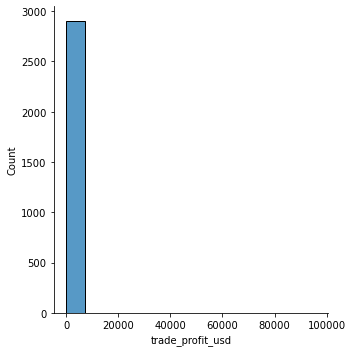

In [34]:
sns.displot(train.trade_profit_usd)

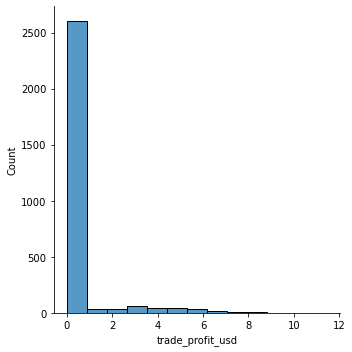

In [35]:
sns.displot(train.trade_profit_usd.apply(lambda x: np.log1p(x)))

# trades_count

In [36]:
train.trades_count.value_counts() 

0.0      2559
1.0         9
4.0         8
13.0        8
18.0        7
         ... 
161.0       1
152.0       1
784.0       1
123.0       1
855.0       1
Name: trades_count, Length: 183, dtype: int64

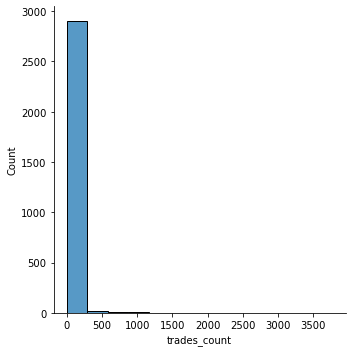

In [37]:
sns.displot(train.trades_count)

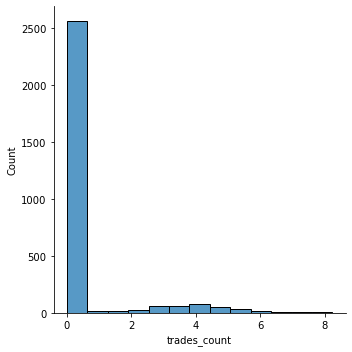

In [40]:
sns.displot(train.trades_count.apply(lambda x: np.log1p(x)))

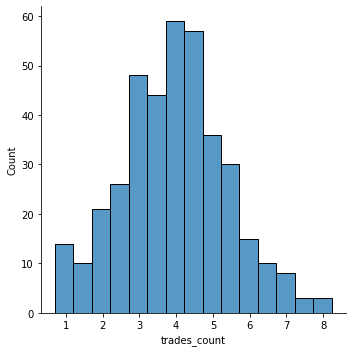

In [39]:
sns.displot(train.trades_count[train.trades_count>0].apply(lambda x: np.log1p(x)))

# revenue

In [41]:
train.revenue.value_counts() 

0.000000        2285
0.617071           3
1.077168           3
0.477610           2
0.547572           2
                ... 
36874.547800       1
1642.652580        1
144.089096         1
8.693423           1
198.424200         1
Name: revenue, Length: 647, dtype: int64

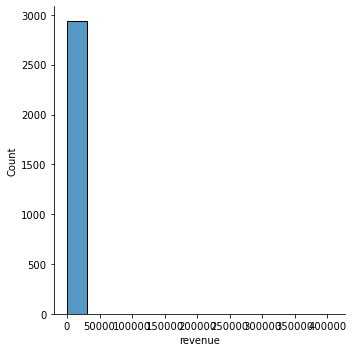

In [42]:
sns.displot(train.revenue)

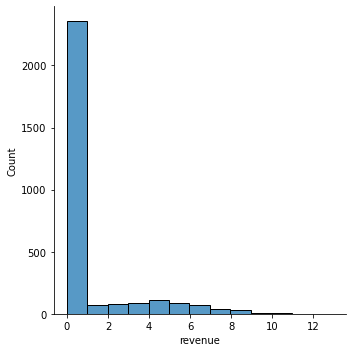

In [43]:
sns.displot(train.revenue.apply(lambda x: np.log1p(x)))

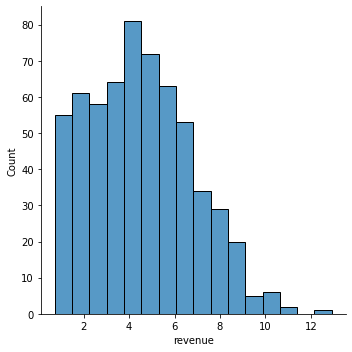

In [47]:
sns.displot(train.revenue[train.revenue>1].apply(lambda x: np.log1p(x)))

# user

In [49]:
train.user.value_counts()

af4cca5c    1
23041dc3    1
b66c8353    1
3cb9a5ca    1
7b10d63d    1
           ..
e72d6f0e    1
0b9df996    1
79af0816    1
4f317bd2    1
be545efd    1
Name: user, Length: 2943, dtype: int64

In [51]:
train.user.unique().shape

(2943,)

# region

In [52]:
train.region.value_counts()

Middle-Earth           1009
Narnia                  490
Oz                      332
Neverwinter             323
Azeroth                 231
Galaxy Far Far Away     187
Hyboria                 128
Randland                 91
Westeros                 62
Asgard                   52
Dinotopia                29
Forgotten Realms          4
Other                     4
0                         1
Name: region, dtype: int64

# device

In [54]:
train.device.value_counts()

Web    2648
0       287
App       8
Name: device, dtype: int64

# revenue

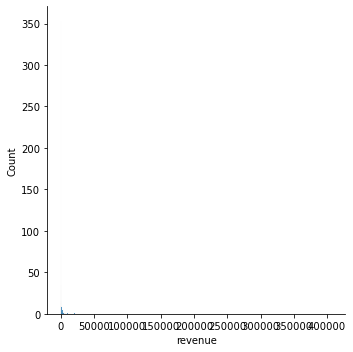

In [58]:
sns.displot(train[train.revenue != 0].revenue)

In [59]:
train[train.revenue != 0].revenue.max()

407185.427030935

In [60]:
train[train.revenue != 0].revenue.min()

0.0007384

In [61]:
train[train.revenue != 0].revenue.median()

58.028277450000004

In [62]:
train[train.revenue != 0].revenue.mean()

1667.393465219435